# Pre-processing images and visualization

This notebook shows how to do very basic pre-processing on the images (multispectral and RGB):

 - The pre-processing step example is to center crop the images to the good size. 
It can be extended to add more pre-processing (ex: remove images with too much clouds)

It also shows how to visualize 13 bands images (using RGB channels)

In [2]:
from PIL import Image
from matplotlib.pyplot import imshow
from pathlib import Path
from tqdm import tqdm
import numpy as np
from os import scandir, walk
from skimage import io

In [3]:
# Do you want to launch the resizing process?
LAUNCH = True

In [11]:
# Multispectral functions
def open_allbands(path):
    return io.imread(str(path))

def center_crop_allbands(img, new_width=64, new_height=None):        

    
    height = img.shape[0]
    width = img.shape[1]

    if new_height is None:
        new_height = new_width

    left = int(np.ceil((width - new_width) / 2))
    right = width - int(np.floor((width - new_width) / 2))

    top = int(np.ceil((height - new_height) / 2))
    bottom = height - int(np.floor((height - new_height) / 2))
    
   
    center_cropped_img = img[top:bottom,left:right,:]
    
    assert((center_cropped_img.shape[0] == new_height) and (center_cropped_img.shape[1] == new_width))

    return center_cropped_img

def crop_on_img_allbands(filename, path_target, size=64):
    img = open_allbands(filename)
    img = center_crop_allbands(img, size, size)
    print(path_target+filename.stem+'.npy')
    np.save(path_target+filename.stem+'.npy', img)
    return img

In [5]:
# RGB functions
def center_crop(img, new_width=64, new_height=None):        

    width = img.width
    height = img.height


    if new_height is None:
        new_height = new_width

    left = int(np.ceil((width - new_width) / 2))
    right = width - int(np.floor((width - new_width) / 2))

    top = int(np.ceil((height - new_height) / 2))
    bottom = height - int(np.floor((height - new_height) / 2))
    
   
    center_cropped_img = img.crop((left, top, right, bottom))
    
    assert((center_cropped_img.height == new_height) and (center_cropped_img.width == new_width))

    return center_cropped_img

def crop_on_img(filename, path_target, size=41):
    img = Image.open(filename)
    img = center_crop(img, size, size)
    print(path_target+filename.stem+'.png')
    img.save(path_target+filename.stem+'.png')
    return img


# RGB example: Center crop the images

In [26]:
path_source = 'data/RGB/'
path_target = path_source + 'crop/'


if LAUNCH:
    for r, d, f in walk(path_source):
        if r != path_source:
            break
        print(f'In directory {r}: {len(f)} files')
        for file in f:
            print(f'working on img {path_source+file}')
            image = Path(path_source+file)    
            print(crop_on_img(image, path_target, 64))

In directory data/RGB/: 2 files
working on img data/RGB/0.tif
data/RGB/crop/0.png
<PIL.Image.Image image mode=RGB size=64x64 at 0x7F68ABF90C18>
working on img data/RGB/7.tif
data/RGB/crop/7.png
<PIL.Image.Image image mode=RGB size=64x64 at 0x7F68ABF90C18>


# Multispectral example: Center crop the images

In [12]:
path_source = 'data/ALL/'
path_target = path_source + 'crop/'


if LAUNCH:
    for r, d, f in walk(path_source):
        if r != path_source:
            break
        print(f'In directory {r}: {len(f)} files')
        for file in f:
            print(f'working on img {path_source+file}')
            image = Path(path_source+file)    
            print(crop_on_img_allbands(image, path_target, 64).shape)

In directory data/ALL/: 2 files
working on img data/ALL/0-0_84-28586591_27-42846051.tif
data/ALL/crop/0-0_84-28586591_27-42846051.npy
(64, 64, 13)
working on img data/ALL/7-0_84-40851276_27-42944815.tif
data/ALL/crop/7-0_84-40851276_27-42944815.npy
(64, 64, 13)


# Visualization of images

In [51]:
# This function clips the RGB bands and maps the remaining values to the [0, 255] range
def visualize_all_bands(raw, bands=[3,2,1], min_map=0, max_map=2000, nmin=0, nmax=255):
    scale = (nmax-nmin) / (max_map-min_map)
    
 
    seg = raw[...,bands]
    
    seg = np.clip(seg, min_map, max_map)
    
    
    
    for i in range(seg.shape[-1]):
        print(f'Working on dim {i}')
        seg[..., i] = seg[..., i] * scale + nmin - min_map * scale
    
    
    return seg.astype(int)

In [42]:
sample1_all = 'data/ALL/crop/0-0_84-28586591_27-42846051.npy'
sample1_rgb = 'data/RGB/crop/0.png'

sample2_all = 'data/ALL/crop/7-0_84-40851276_27-42944815.npy'
sample2_rgb = 'data/RGB/crop/7.png'

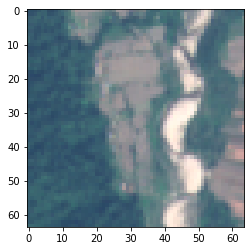

In [46]:
imshow(Image.open(sample1_rgb))


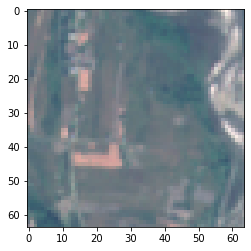

In [47]:
imshow(Image.open(sample2_rgb))

Working on dim 0
Working on dim 1
Working on dim 2


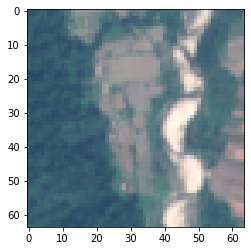

In [52]:

imshow(visualize_all_bands(np.load(sample1_all)))

Working on dim 0
Working on dim 1
Working on dim 2


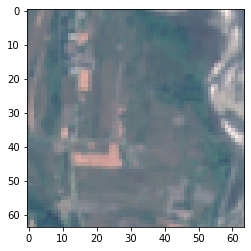

In [53]:
imshow(visualize_all_bands(np.load(sample2_all)))